**Unlocking Customer Insights for Customer-Centric Aircraft Design and Value Engineering through Feedback Analysis** <br>

The automotive industry has been incorporating numerous new features into their vehicles based on valuable customer feedback. This progress has been made possible through direct interaction and engagement with customers. However, in the aviation industry, there exists a gap between the Original Equipment Manufacturer (OEM) and the final users, the passengers, primarily due to the existing business model.

In order to address this gap and drive improvement, we aim to bridge the divide and explore opportunities for value engineering within the aviation industry. Through this exercise, we seek to leverage customer-centric feedback and apply it to the aviation industry, much like how the automotive industry has successfully done. By gathering and analyzing passenger feedback, we can identify opportunities for innovation, refine existing processes, and develop solutions that address their specific needs.


Referece 

https://aylien.com/blog/understanding-customer-frustrations-in-the-airline-industry-with-aspect-based-sentiment-analysis <br>
https://towardsdatascience.com/how-to-extract-data-from-the-twitter-api-using-python-b6fbd7129a33 <br>
https://www.youtube.com/watch?v=rRTvsuGRnJ0 <br>
https://www.bytewax.io/blog/twitter-stream-nlp <br>
https://www.xenonstack.com/blog/natural-language-processing <br>
https://learning.oreilly.com/library/view/python-natural-language/9781787121423/6f015f49-58e9-4dd1-8045-b11e7f8bf2c8.xhtml


The method that we will use in this analysis is **Natural Language Processing (NLP)**. NLP is the branch of artificial intelligence that gives machines the ability to read, understand, and derive meaning from human languages. NLP combines linguistic and computer science to analyze and understand the underlying grammatical and systematic rules of language. The steps of NLP involve the following:

1. Segmentation: Breaking the entire document down into constituent sentences.
2. Tokenizing: Breaking each sentence into its constituent words and storing them.
3. Stopwords: Removing commonly used words that do not carry significant meaning, such as articles, prepositions, and conjunctions.
4. Stemming: Reducing words to their base or root form by removing suffixes and prefixes. For example, "running" becomes "run."
5. Lemmatization: Similar to stemming, but instead of truncating words, lemmatization converts words to their base form using vocabulary and morphological analysis. For example, "running" becomes "run" and "better" becomes "good."
6. Speed Tagging: Assigning part-of-speech tags to each word in a sentence based on its grammatical role, such as noun, verb, adjective, etc. This process involves using algorithms or models to automatically assign these tags based on contextual and linguistic features.


In this project, we will explreorr both classical NLP and Deep learning based NLP. We will compare the accuracy of models. We will use dataset from Process Twitter API  - Aspect-based sentiment analysis. First we will exptere the data through Exploratory Data Analysis


## Part 1 :  Exploratory Data Analysis ##

In [75]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from PIL import Image
import matplotlib.pyplot as plt


data = pd.read_csv("Tweets.csv")

In [74]:
pip install Pillow


Note: you may need to restart the kernel to use updated packages.


In [ ]:
# Open the image file
image = Image.open('path/to/your/image.jpg')

# Display the image
plt.imshow(image)
plt.axis('off')
plt.show()


In [11]:
data.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tweet_id                      14640 non-null  int64  
 1   airline_sentiment             14640 non-null  object 
 2   airline_sentiment_confidence  14640 non-null  float64
 3   negativereason                9178 non-null   object 
 4   negativereason_confidence     10522 non-null  float64
 5   airline                       14640 non-null  object 
 6   airline_sentiment_gold        40 non-null     object 
 7   name                          14640 non-null  object 
 8   negativereason_gold           32 non-null     object 
 9   retweet_count                 14640 non-null  int64  
 10  text                          14640 non-null  object 
 11  tweet_coord                   1019 non-null   object 
 12  tweet_created                 14640 non-null  object 
 13  t

In [22]:
# We have total 7 ailine customers in the dataset
data['airline'].unique()

array(['Virgin America', 'United', 'Southwest', 'Delta', 'US Airways',
       'American'], dtype=object)

In [17]:
#Extract columns that needed for analysis
data_clean = data[["airline_sentiment", "airline", "text"]]

In [18]:
data_clean.head()

,airline_sentiment,airline,text
0,neutral,Virgin America,@VirginAmerica What @dhepburn said.
1,positive,Virgin America,@VirginAmerica plus you've added commercials t...
2,neutral,Virgin America,@VirginAmerica I didn't today... Must mean I n...
3,negative,Virgin America,@VirginAmerica it's really aggressive to blast...
4,negative,Virgin America,@VirginAmerica and it's a really big bad thing...


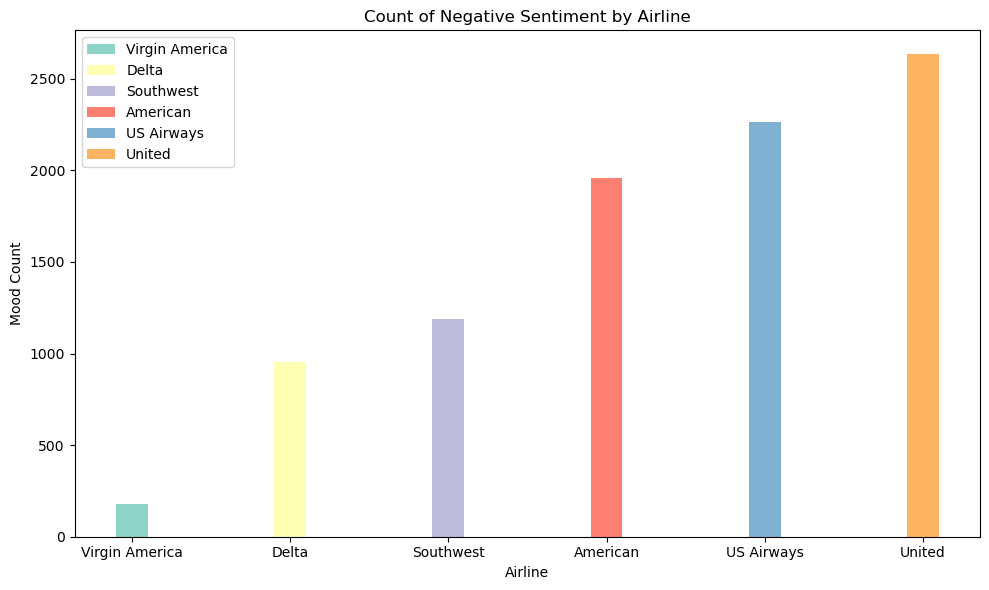

In [46]:
airlines = data['airline'].unique()
sentiment = 'negative'

# Sort airlines based on the count of the negative sentiment in ascending order
sorted_airlines = data[data['airline_sentiment'] == sentiment].groupby('airline').size().sort_values().index

# Define a color palette with enough distinct colors for the airlines
palette = sns.color_palette('Set3', n_colors=len(airlines))

fig, ax = plt.subplots(figsize=(10, 6))

width = 0.2  # Width of each bar
bar_positions = range(len(sorted_airlines))

for i, airline in enumerate(sorted_airlines):
    count = data[(data['airline'] == airline) & (data['airline_sentiment'] == sentiment)].shape[0]
    
    # Plot the bars for each airline using the corresponding color from the palette
    ax.bar(bar_positions[i], count, width=width, color=palette[i], label=airline)

ax.set_xticks(bar_positions)
ax.set_xticklabels(sorted_airlines)
ax.set_ylabel('Mood Count')
ax.set_xlabel('Airline')
ax.set_title('Count of Negative Sentiment by Airline')
ax.legend()

plt.tight_layout()
plt.show()


## Part 2: Conventional Representations

In [49]:
import tensorflow_hub as hub

module_url = "https://tfhub.dev/google/universal-sentence-encoder/4"

model = hub.load(module_url)

2023-05-21 21:27:33.365580: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


In [48]:
pip install tensorflow_hub


  Using cached tensorflow_hub-0.13.0-py2.py3-none-any.whl (100 kB)
Note: you may need to restart the kernel to use updated packages.


In [54]:
X = data['text']
y = data['airline_sentiment']

In [58]:
import sklearn
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Generate vectors for each string in the training set
xtrain = model(X_train)
# Generate vectors for each string in the test set
xtest = model(X_test)

In [61]:
#Use the CountVectorizer class from sklearn to create a vector.
from sklearn.feature_extraction.text import CountVectorizer

# create the transform
vectorizer = CountVectorizer()
vectorizer.fit(X_train, X_test)

CountVectorizer()

In [73]:
from sklearn.linear_model import Ridge
import numpy as np
from sklearn.preprocessing import OrdinalEncoder

# Initialize the ordinal encoder
ordinal_encoder = OrdinalEncoder(categories=[['negative', 'neutral', 'positive']])

# Encode the target variable
y_train_encoded = ordinal_encoder.fit_transform(y_train.values.reshape(-1, 1))
y_test_encoded = ordinal_encoder.transform(y_test.values.reshape(-1, 1))

# Train a Ridge regression model on the training data
ridge = Ridge(alpha=1.0)
ridge.fit(xtrain, y_train_encoded)

# Evaluate the model on the testing data
score = ridge.score(xtest, y_test_encoded)